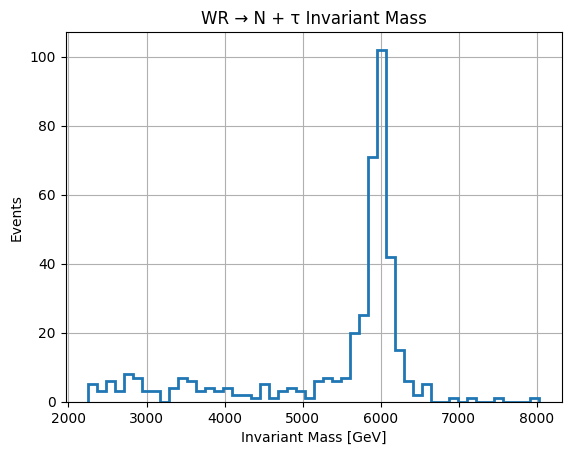

In [5]:
import pyhepmc as hep
import numpy as np
import matplotlib.pyplot as plt

class WRMassReconstructor:
    def __init__(self):
        self.masses = []

    def SetInput(self, input_file):
        self.input = hep.open(input_file)

    def SetTargetParticles(self, id1, id2):
        self.id1 = id1
        self.id2 = id2

    def Run(self):
        for event in self.input:
            particles = event.particles
            p1 = None
            p2 = None

            for p in particles:
                if p1 is None and p.pid == self.id1:
                    p1 = p
                elif p2 is None and p.pid == self.id2:
                    p2 = p

            if p1 and p2:
                vec1 = self._get_four_vector(p1.momentum)
                vec2 = self._get_four_vector(p2.momentum)
                mass = self._invariant_mass(vec1, vec2)
                self.masses.append(mass)

        self.input.close()

    def Plot(self, bins=50):
        plt.hist(self.masses, bins=bins, histtype='step', linewidth=2)
        plt.xlabel("Invariant Mass [GeV]")
        plt.ylabel("Events")
        plt.title("WR → N + τ Invariant Mass")
        plt.grid(True)
        plt.show()

    @staticmethod
    def _get_four_vector(momentum):
        px, py, pz, E = momentum
        return {"E": E, "px": px, "py": py, "pz": pz}

    @staticmethod
    def _invariant_mass(p1, p2):
        E = p1["E"] + p2["E"]
        px = p1["px"] + p2["px"]
        py = p1["py"] + p2["py"]
        pz = p1["pz"] + p2["pz"]
        return np.sqrt(max(E**2 - px**2 - py**2 - pz**2, 0))


# 사용 예시
reco = WRMassReconstructor()
reco.SetInput("/data6/Users/snuintern1/fork_gen_999/submit_files/condorfiles/LO999/result_WR6000_N2000/cmsgrid_final.lhe")
reco.SetTargetParticles(9900016, 15)  # N and tau
reco.Run()
reco.Plot()
